In [2]:
%load_ext autoreload
%autoreload 2
from ASD_Circuits import *

def clean_name(name):
    name = re.sub('[()]', '', name)
    name = re.sub('[-]', ' ', name)
    name = "_".join(name.split())
    return name

# Expression Zscores

In [4]:
ExpMat = pd.read_csv("../dat/allen-mouse-exp/jon/energy-conn-model-no_log-no_quant_norm.csv", 
                 index_col="ROW")

In [6]:
ExpMat_Log = ExpMat.copy(deep=True)
for c in ExpMat.columns.values:
    ExpMat_Log[c] = np.log2(1+ExpMat_Log[c])
ExpMat_Log_QN = quantileNormalize(ExpMat_Log)
ExpMat_Log_QN.to_csv("dat/ExpMat/Energy.ExpLevel.Log2.QN.csv")

In [8]:
df_z = []
for i in ExpMat_Log_QN.index.values :
    i_z = ZscoreConverting(ExpMat_Log_QN.loc[i,:].values)
    df_z.append(i_z)
ExpZscoreMat = pd.DataFrame(data=df_z, 
                            columns=ExpMat_Log_QN.columns.values, index=ExpMat_Log_QN.index.values)
ExpZscoreMat.to_csv("dat/ExpMat/Energy.ExpZ1.csv")

In [9]:
ExpZscoreMat_QN = quantileNormalize(ExpZscoreMat)
ExpZscoreMat_QN.to_csv("dat/ExpMat/Energy.ExpZ1.QN.csv")

# Old

In [ ]:
### Subset expression matrix

In [3]:
# expression matrix
raw_matrix = pd.read_csv("../dat/allen-mouse-exp/replicate/expression_energy.csv")

In [5]:
print(raw_matrix.shape)
raw_matrix.head(2)

(26078, 1328)


,gene,1000,223,12998,163,552,875,484682524,484682500,561,...,651,607344834,484682520,438,304325711,324,321,796,436,1051
0,68637491,NaN,8.54318,NaN,NaN,NaN,11.279900,NaN,NaN,NaN,...,8.374100,NaN,NaN,9.31575,NaN,14.19060,8.33054,12.49050,NaN,NaN
1,1086,NaN,1.63863,NaN,3.04064,NaN,0.860511,NaN,NaN,NaN,...,0.398294,NaN,NaN,0.72872,NaN,1.53664,1.14846,1.01822,NaN,NaN


# Log and Quantile Norm

In [103]:
def modify_str(x):
    x = re.sub("[()]", "", x)
    x = re.sub("-", "_", x)
    x = re.sub("reunions", "reuniens", x)
    x = "_".join(x.split(" "))
    return x

cell_comp = pd.read_csv("../dat/cell_composition/Cell_Atlas_for_the_Mouse_brain_2.csv", index_col="Regions")
STRs = cell_comp.index.values
STRs = [modify_str(x) for x in STRs]
cell_comp.index = STRs

In [2]:
161114.9996 * 121591 / 19845690

987.1228421064524

In [3]:
160286.5913 * 261163 / 42954307

974.5455105044972

In [4]:
171331.5192 * 203603 / 35649755

978.5091455376792

In [ ]:
###

In [ ]:
df = pd.read_csv("../dat/allen-mouse-exp/jon/energy-conn-model-no_log-no_quant_norm.csv", 
                 index_col="ROW")
df2 = 

### Analyze Cell Comp

In [154]:
STRs = [x.strip() for x in open("/Users/jiayao/Work/ASD_Circuits/dat/allen-mouse-exp/Structures.txt", 'rt')]
STR_cell_comp = cell_comp[cell_comp.index.isin(STRs)]

In [157]:
str2reg_df = pd.read_csv("/Users/jiayao/Work/ASD_Circuits/src/dat/structure2region.map", delimiter="\t")
str2reg_df = str2reg_df.sort_values("REG")
str2reg = dict(zip(str2reg_df["STR"].values, str2reg_df["REG"].values))
Thalamus_STRs = str2reg_df[str2reg_df["REG"]=="Thalamus"]["STR"].values

In [159]:
np.mean(STR_cell_comp["Neurons [mm-3]"].values)

113913.6349535263

In [158]:
STR_cell_comp = STR_cell_comp.sort_values("Neurons [mm-3]")
STR_cell_comp[STR_cell_comp.index.isin(Thalamus_STRs)]

,Cells [mm-3],Neurons [mm-3],Glia [mm-3],Excitatory [mm-3],Inhibitory [mm-3],Modulatory [mm-3],Astrocytes [mm-3],Oligodendrocytes [mm-3],Microglia [mm-3]
Ventral_posterolateral_nucleus_of_the_thalamus,128551.548380,60916.050501,67635.497879,53235.149137,6930.838489,750.062874,7635.833208,50068.574686,9931.089985
Posterior_limiting_nucleus_of_the_thalamus,133862.595420,61055.498246,72807.097174,58005.364143,1459.046833,1591.087270,6701.052197,48538.064782,17567.980194
Lateral_posterior_nucleus_of_the_thalamus,136277.490564,61932.344681,74345.145883,61129.783009,204.933722,597.627949,7269.995170,41595.821184,25479.329529
Posterior_complex_of_the_thalamus,128459.768830,62144.823827,66314.945003,61406.868021,97.499616,640.456191,9130.078687,34406.630421,22778.235894
Parataenial_nucleus,142179.431072,66198.687090,75980.743983,64588.183807,308.096280,1302.407002,7520.350109,42314.223195,26146.170678
Dorsal_part_of_the_lateral_geniculate_complex,151705.403734,67228.885866,84476.517868,64834.128849,1650.847038,743.909979,11183.974280,56589.390380,16703.153209
Ventral_anterior_lateral_complex_of_the_thalamus,135647.421409,67711.526608,67935.894802,62277.378262,4641.051983,793.096363,12491.473187,43275.118143,12169.303472
Ventral_medial_nucleus_of_the_thalamus,133893.194101,68815.975085,65077.219016,63349.271778,3971.787121,1494.916186,9828.341119,51187.688925,4061.188971
Subparafascicular_nucleus_parvicellular_part,144662.969005,68990.538336,75672.430669,56319.303970,10979.880370,1691.353997,8463.730288,59580.206634,7628.493747
Reticular_nucleus_of_the_thalamus,142042.724807,69417.677466,72625.047341,0.000000,68227.360663,1190.316802,9783.919341,59626.552024,3214.575976


In [104]:
df = pd.read_csv("../dat/allen-mouse-exp/jon/energy-conn-model-no_log-no_quant_norm.csv", index_col="ROW")
df3 = pd.read_csv("../dat/allen-mouse-exp/jon/energy-conn-model.csv", index_col="ROW")
df_z = pd.read_csv("../dat/allen-mouse-exp/jon/energy-zscore-conn-model.csv", index_col="ROW")

In [108]:
for c in df.columns.values:
    neuro_count = cell_comp.loc[c, "Neurons [mm-3]"]
    df[c] = (df[c]/neuro_count) * (10**5)

In [109]:
for c in df.columns.values:
    df[c] = np.log2(1+df[c])

In [110]:
df.head(2)

,Anterior_amygdalar_area,Anterior_cingulate_area_dorsal_part,Anterior_cingulate_area_ventral_part,Nucleus_accumbens,Anterodorsal_nucleus,Anterior_hypothalamic_nucleus,Agranular_insular_area_dorsal_part,Agranular_insular_area_posterior_part,Agranular_insular_area_ventral_part,Nucleus_ambiguus,...,Primary_visual_area,Posterolateral_visual_area,posteromedial_visual_area,Ventral_medial_nucleus_of_the_thalamus,Ventromedial_hypothalamic_nucleus,Ventral_posterolateral_nucleus_of_the_thalamus,Ventral_posteromedial_nucleus_of_the_thalamus,Ventral_posteromedial_nucleus_of_the_thalamus_parvicellular_part,Ventral_tegmental_area,Hypoglossal_nucleus
ROW,,,,,,,,,,,,,,,,,,,,,
1,0.289214,0.17318,0.112250,0.069124,0.053648,0.189964,0.101406,NaN,0.130877,0.124475,...,0.070831,0.309902,0.030476,0.087756,0.160053,0.119037,0.135627,0.092830,0.325437,0.401278
2,0.139749,0.04379,0.053844,0.071434,0.467677,0.058517,0.699151,0.147103,0.359120,0.086038,...,0.085131,0.012014,0.257121,0.147648,0.057961,0.055195,0.049819,0.097014,0.356253,1.510630


In [111]:
#df = quantileNormalize(df.transpose()).transpose()
df = quantileNormalize(df)

In [112]:
df.head(2)

,Anterior_amygdalar_area,Anterior_cingulate_area_dorsal_part,Anterior_cingulate_area_ventral_part,Nucleus_accumbens,Anterodorsal_nucleus,Anterior_hypothalamic_nucleus,Agranular_insular_area_dorsal_part,Agranular_insular_area_posterior_part,Agranular_insular_area_ventral_part,Nucleus_ambiguus,...,Primary_visual_area,Posterolateral_visual_area,posteromedial_visual_area,Ventral_medial_nucleus_of_the_thalamus,Ventromedial_hypothalamic_nucleus,Ventral_posterolateral_nucleus_of_the_thalamus,Ventral_posteromedial_nucleus_of_the_thalamus,Ventral_posteromedial_nucleus_of_the_thalamus_parvicellular_part,Ventral_tegmental_area,Hypoglossal_nucleus
ROW,,,,,,,,,,,,,,,,,,,,,
1,0.228752,0.109119,0.114392,0.083753,0.052745,0.460467,0.047513,2.581530,0.130944,0.106479,...,0.056377,0.403981,0.012231,0.186609,0.445879,0.190655,0.246800,0.193502,0.417762,0.351683
2,0.118315,0.021400,0.054528,0.086906,0.584108,0.182667,0.382891,0.159702,0.300331,0.083196,...,0.072563,0.029872,0.296074,0.276181,0.198935,0.093283,0.107603,0.199023,0.450400,1.179515


In [113]:
df.to_csv("exp.neronorm.csv")

In [119]:
df_z = []
for i in df.index.values :
    i_z = ZscoreConverting(df.loc[i,:].values)
    df_z.append(i_z)
df_z = pd.DataFrame(data=df_z, columns=df.columns.values, index=df.index.values)

In [120]:
df_z.head(2)

,Anterior_amygdalar_area,Anterior_cingulate_area_dorsal_part,Anterior_cingulate_area_ventral_part,Nucleus_accumbens,Anterodorsal_nucleus,Anterior_hypothalamic_nucleus,Agranular_insular_area_dorsal_part,Agranular_insular_area_posterior_part,Agranular_insular_area_ventral_part,Nucleus_ambiguus,...,Primary_visual_area,Posterolateral_visual_area,posteromedial_visual_area,Ventral_medial_nucleus_of_the_thalamus,Ventromedial_hypothalamic_nucleus,Ventral_posterolateral_nucleus_of_the_thalamus,Ventral_posteromedial_nucleus_of_the_thalamus,Ventral_posteromedial_nucleus_of_the_thalamus_parvicellular_part,Ventral_tegmental_area,Hypoglossal_nucleus
1,-0.132605,-0.373249,-0.362642,-0.424273,-0.486647,0.333497,-0.497170,4.600078,-0.329347,-0.378560,...,-0.479341,0.219874,-0.568142,-0.217375,0.304154,-0.209237,-0.096299,-0.203511,0.247594,0.114676
2,-0.533919,-0.744242,-0.672348,-0.602081,0.476933,-0.394263,0.040258,-0.444103,-0.138912,-0.610132,...,-0.633210,-0.725857,-0.148152,-0.191323,-0.358960,-0.588242,-0.557166,-0.358769,0.186763,1.769070


In [121]:
df_z.to_csv("zscore.neuronorm.csv")

In [101]:
df3.head(2)

,Anterior_amygdalar_area,Anterior_cingulate_area_dorsal_part,Anterior_cingulate_area_ventral_part,Nucleus_accumbens,Anterodorsal_nucleus,Anterior_hypothalamic_nucleus,Agranular_insular_area_dorsal_part,Agranular_insular_area_posterior_part,Agranular_insular_area_ventral_part,Nucleus_ambiguus,...,Primary_visual_area,Posterolateral_visual_area,posteromedial_visual_area,Ventral_medial_nucleus_of_the_thalamus,Ventromedial_hypothalamic_nucleus,Ventral_posterolateral_nucleus_of_the_thalamus,Ventral_posteromedial_nucleus_of_the_thalamus,Ventral_posteromedial_nucleus_of_the_thalamus_parvicellular_part,Ventral_tegmental_area,Hypoglossal_nucleus
ROW,,,,,,,,,,,,,,,,,,,,,
1,0.129948,0.060500,0.063547,0.046318,0.029235,0.283072,0.026315,NaN,0.072782,0.058972,...,0.031173,0.242497,0.007004,0.104897,0.272817,0.107278,0.140856,0.109031,0.251835,0.214892
2,0.065605,0.012055,0.030225,0.048060,0.375491,0.102894,0.228004,0.093791,0.174076,0.046022,...,0.040116,0.016684,0.171418,0.158988,0.112546,0.051621,0.059596,0.112288,0.274680,1.004292


In [60]:
np.quantile(df3.loc[:, "Anterior_amygdalar_area"], [0.1, 0.5, 0.9])

array([nan, nan, nan])

In [28]:
df3.head(2)

,Anterior_amygdalar_area,Anterior_cingulate_area_dorsal_part,Anterior_cingulate_area_ventral_part,Nucleus_accumbens,Anterodorsal_nucleus,Anterior_hypothalamic_nucleus,Agranular_insular_area_dorsal_part,Agranular_insular_area_posterior_part,Agranular_insular_area_ventral_part,Nucleus_ambiguus,...,Primary_visual_area,Posterolateral_visual_area,posteromedial_visual_area,Ventral_medial_nucleus_of_the_thalamus,Ventromedial_hypothalamic_nucleus,Ventral_posterolateral_nucleus_of_the_thalamus,Ventral_posteromedial_nucleus_of_the_thalamus,Ventral_posteromedial_nucleus_of_the_thalamus_parvicellular_part,Ventral_tegmental_area,Hypoglossal_nucleus
ROW,,,,,,,,,,,,,,,,,,,,,
1,0.129948,0.060500,0.063547,0.046318,0.029235,0.283072,0.026315,NaN,0.072782,0.058972,...,0.031173,0.242497,0.007004,0.104897,0.272817,0.107278,0.140856,0.109031,0.251835,0.214892
2,0.065605,0.012055,0.030225,0.048060,0.375491,0.102894,0.228004,0.093791,0.174076,0.046022,...,0.040116,0.016684,0.171418,0.158988,0.112546,0.051621,0.059596,0.112288,0.274680,1.004292


In [29]:
df_z.head(2)

,Anterior_amygdalar_area,Anterior_cingulate_area_dorsal_part,Anterior_cingulate_area_ventral_part,Nucleus_accumbens,Anterodorsal_nucleus,Anterior_hypothalamic_nucleus,Agranular_insular_area_dorsal_part,Agranular_insular_area_posterior_part,Agranular_insular_area_ventral_part,Nucleus_ambiguus,...,Primary_visual_area,Posterolateral_visual_area,posteromedial_visual_area,Ventral_medial_nucleus_of_the_thalamus,Ventromedial_hypothalamic_nucleus,Ventral_posterolateral_nucleus_of_the_thalamus,Ventral_posteromedial_nucleus_of_the_thalamus,Ventral_posteromedial_nucleus_of_the_thalamus_parvicellular_part,Ventral_tegmental_area,Hypoglossal_nucleus
ROW,,,,,,,,,,,,,,,,,,,,,
1,0.160640,-0.539151,-0.504039,-0.761514,-0.693057,1.644459,-0.925717,NaN,-0.445818,-0.491675,...,-0.826143,1.096054,-1.042355,-0.149323,1.309058,-0.090982,0.224138,-0.079631,1.733755,0.713979
2,-0.476559,-0.559858,-0.517532,-0.524072,0.155115,-0.414608,-0.132721,-0.366088,-0.228982,-0.431620,...,-0.477846,-0.507564,-0.227690,-0.304094,-0.342913,-0.506061,-0.469515,-0.360612,-0.054091,1.149714


In [39]:
dd = ZscoreConverting(df3.loc[1,:].values)

In [40]:
xx = []; yy = []
for x, y in zip(df_z.loc[1, :].values, dd):
    if x==x and y==y:
        xx.append(x); yy.append(y)

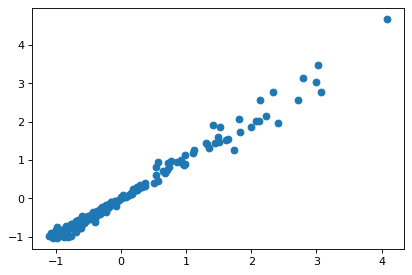

In [41]:
plt.scatter(xx, yy)

In [123]:
df = pd.read_csv("/Users/jiayao/Work/spark/dat/30K/GWAS/iPSYCH-PGC_ASD_Nov2017.tsv", delimiter="\t")
df = df.sort_values("P")

In [124]:
df.head(10)

,CHR,SNP,BP,A1,A2,INFO,OR,SE,P
644082,20,rs910805,21248116,A,G,0.999,0.90874,0.0160,2.041000e-09
649668,20,rs1000177,21233198,T,C,0.996,1.10142,0.0163,3.323000e-09
648697,20,chr20:21411615,21411615,T,TA,0.983,0.90883,0.0163,4.265000e-09
633582,20,rs12625304,21182388,T,C,0.965,0.90077,0.0181,8.160000e-09
5563533,8,rs10099100,10576775,C,G,0.981,1.08796,0.0147,1.065000e-08
631776,20,chr20:21199826,21199826,A,T,0.860,0.90737,0.0171,1.191000e-08
635552,20,rs73128919,21237133,A,G,0.982,0.89906,0.0187,1.191000e-08
636853,20,rs10627346,21258707,A,AAAAAC,0.979,1.09505,0.0159,1.241000e-08
636313,20,chr20:21117240,21117240,GTTT,GTT,0.859,1.09057,0.0153,1.337000e-08
638750,20,rs57976745,21401057,TTG,T,0.979,1.09867,0.0166,1.376000e-08


In [17]:
# subset to 213 selected structures
structure_df = pd.read_csv("../dat/allen-mouse-exp/replicate/allen_brain_atlas_structures.csv")
Selected_STR = [x.strip() for x in open("/Users/jiayao/Work/ASD_Circuits/dat/allen-mouse-exp/Structures.txt", 'rt')]

In [18]:
def clean_name(name):
    name = re.sub('[()]', '', name)
    name = re.sub('[-]', ' ', name)
    name = "_".join(name.split())
    return name

In [19]:
STR_ID2Name = {}
selected_str_ids = []
for i, row in structure_df.iterrows():
    name = row["safe_name"]
    name = re.sub('[()]', '', name)
    name = re.sub('[-]', ' ', name)
    name = "_".join(name.split())
    if name in Selected_STR:
        STR_ID2Name[str(row["id"])] = name
        selected_str_ids.append(str(row["id"]))
STR_ID2Name["gene"] = "section_id"

In [20]:
raw_matrix = raw_matrix[["gene"]+selected_str_ids]

NameError: name 'raw_matrix' is not defined

In [58]:

raw_matrix.shape

(26078, 214)

In [66]:
raw_matrix.columns = [STR_ID2Name[x] for x in raw_matrix.columns]

In [68]:
raw_matrix.shape

(26078, 214)

In [69]:
### convert section id -> mouse gene -> human gene expression matrix

# Connectome Data Generation

In [2]:
W_ipsi = pd.read_excel("../dat/allen-mouse-conn/nature13186-s4.xlsx", sheet_name="W_ipsi")
PValue_ipsi = pd.read_excel("../dat/allen-mouse-conn/nature13186-s4.xlsx", sheet_name="PValue_ipsi")
W_contra = pd.read_excel("../dat/allen-mouse-conn/nature13186-s4.xlsx", sheet_name="W_contra")
PValue_contra = pd.read_excel("../dat/allen-mouse-conn/nature13186-s4.xlsx", sheet_name="PValue_contra")
W_ipsi = W_ipsi.set_index("Unnamed: 0")
PValue_ipsi = PValue_ipsi.set_index("Unnamed: 0")
W_contra = W_contra.set_index("Unnamed: 0")
PValue_contra = PValue_contra.set_index("Unnamed: 0")

In [4]:
## Rename
ontology = pd.read_csv("dat/ontology.csv")
#onotology = pd.read_csv("dat/voxel.csv")
#ontology["acronym"] = 
acronym2name = {}
for i, row in ontology.iterrows():
    acronym2name[row["acronym"]] = clean_name(row["safe_name"])

W_ipsi.columns = [acronym2name[x] for x in W_ipsi.columns.values]
W_ipsi.index = [acronym2name[x] for x in W_ipsi.index.values]

PValue_ipsi.columns = [acronym2name[x] for x in PValue_ipsi.columns.values]
PValue_ipsi.index = [acronym2name[x] for x in PValue_ipsi.index.values]

W_contra.columns = [acronym2name[x] for x in W_contra.columns.values]
W_contra.index = [acronym2name[x] for x in W_contra.index.values]

PValue_contra.columns = [acronym2name[x] for x in PValue_contra.columns.values]
PValue_contra.index = [acronym2name[x] for x in PValue_contra.index.values]

In [7]:
PValue_ipsi.loc["Parafascicular_nucleus",:].sort_values(ascending=True)

Superior_central_nucleus_raphe                    0.217601
Caudoputamen                                      0.232525
Globus_pallidus_external_segment                  0.323887
Interpeduncular_nucleus                           0.405673
Central_linear_nucleus_raphe                      0.447798
                                                    ...   
Posterolateral_visual_area                             NaN
posteromedial_visual_area                              NaN
Ventromedial_hypothalamic_nucleus                      NaN
Ventral_posterolateral_nucleus_of_the_thalamus         NaN
Hypoglossal_nucleus                                    NaN
Name: Parafascicular_nucleus, Length: 213, dtype: float64

In [8]:
PValue_ipsi.loc[:,"Parafascicular_nucleus"].sort_values(ascending=True)

Primary_motor_area                                                  4.942729e-43
Reticular_nucleus_of_the_thalamus                                   6.215459e-26
Primary_somatosensory_area_upper_limb                               3.686509e-08
Supplemental_somatosensory_area                                     6.860039e-06
Globus_pallidus_internal_segment                                    1.013853e-05
                                                                        ...     
Ventral_posterolateral_nucleus_of_the_thalamus                               NaN
Ventral_posteromedial_nucleus_of_the_thalamus                                NaN
Ventral_posteromedial_nucleus_of_the_thalamus_parvicellular_part             NaN
Ventral_tegmental_area                                                       NaN
Hypoglossal_nucleus                                                          NaN
Name: Parafascicular_nucleus, Length: 213, dtype: float64

In [4]:
print(W_ipsi.loc["PF", "CP"], PValue_ipsi.loc["PF", "CP"])
print(W_contra.loc["PF", "CP"], PValue_contra.loc["PF", "CP"])

6.454989681406635 0.23252488782048591
0.0 nan


In [5]:
print([x for x in PValue_ipsi.loc["CP", :] if x <0.05])
print([x for x in PValue_contra.loc["CP", :] if x <0.05])

[9.809973667290793e-05, 2.6190042462630665e-17, 3.2382241058312104e-23, 1.2881051983973182e-19, 5.340773390487203e-91, 0.004914260737672786]
[]


In [6]:
f = open("ontology.csv", 'rt')

In [26]:
Dat = []
for i in W_ipsi.index.values:
    row = []
    for j in W_ipsi.columns.values:
        if i == j:
            w = 0
            row.append(w)
            continue
        if PValue_ipsi.loc[i,j] <= 0.05:
            w_ipsi = W_ipsi.loc[i,j]
        else:
            w_ipsi = 0
        if PValue_contra.loc[i,j] <= 0.05:
            w_contra = W_contra.loc[i,j]
        else:
            w_contra = 0
        w = max(w_ipsi, w_contra) #/ (volume.loc[i, "VOLUME"] * volume.loc[j, "VOLUME"])
        row.append(w)
    Dat.append(row)
conn_p005 = pd.DataFrame(data=Dat, index=W_ipsi.index.values, columns=W_ipsi.columns.values)

In [33]:
NoSource, NoTarget = [], []
for STR in conn_p005.index:
    Source = conn_p005.loc[STR, :].values
    Target = conn_p005.loc[:, STR].values
    #print(Source)
    _source = np.where(Source!=0)[0]
    _target = np.where(Target!=0)[0]
    if len(_target) == 0:
        NoTarget.append(STR)
    if len(_source)==0:
        NoSource.append(STR)
print(NoSource, NoTarget)

['Lateral_vestibular_nucleus', 'Lateral_septal_nucleus_caudal_caudodorsal_part', 'Lateral_septal_nucleus_ventral_part', 'Medial_geniculate_complex_medial_part', 'Parafascicular_nucleus', 'Presubiculum', 'Rhomboid_nucleus', 'Septofimbrial_nucleus', 'Superior_olivary_complex', 'Motor_nucleus_of_trigeminal'] []


### Set Pvalue Cut to 0.5

In [34]:
Dat = []
for i in W_ipsi.index.values:
    row = []
    for j in W_ipsi.columns.values:
        if i == j:
            w = 0
            row.append(w)
            continue
        if PValue_ipsi.loc[i,j] <= 0.5:
            w_ipsi = W_ipsi.loc[i,j]
        else:
            w_ipsi = 0
        if PValue_contra.loc[i,j] <= 0.5:
            w_contra = W_contra.loc[i,j]
        else:
            w_contra = 0
        w = max(w_ipsi, w_contra) #/ (volume.loc[i, "VOLUME"] * volume.loc[j, "VOLUME"])
        row.append(w)
    Dat.append(row)
conn_p05 = pd.DataFrame(data=Dat, index=W_ipsi.index.values, columns=W_ipsi.columns.values)

In [11]:
print(graph_sparsity(new_df))
new_df.head(2)

0.11807621944499548


,Anterior_amygdalar_area,Anterior_cingulate_area_dorsal_part,Anterior_cingulate_area_ventral_part,Nucleus_accumbens,Anterodorsal_nucleus,Anterior_hypothalamic_nucleus,Agranular_insular_area_dorsal_part,Agranular_insular_area_posterior_part,Agranular_insular_area_ventral_part,Nucleus_ambiguus,...,Primary_visual_area,Posterolateral_visual_area,posteromedial_visual_area,Ventral_medial_nucleus_of_the_thalamus,Ventromedial_hypothalamic_nucleus,Ventral_posterolateral_nucleus_of_the_thalamus,Ventral_posteromedial_nucleus_of_the_thalamus,Ventral_posteromedial_nucleus_of_the_thalamus_parvicellular_part,Ventral_tegmental_area,Hypoglossal_nucleus
Anterior_amygdalar_area,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.113436,0.0
Anterior_cingulate_area_dorsal_part,0.0,0.0,0.949079,0.0,0.00953,0.0,0.0,0.0,0.052523,0.0,...,0.700777,0.0,0.0,0.091221,0.0,0.0,0.0,0.0,0.097992,0.0


In [35]:
NoSource, NoTarget = [], []
for STR in conn_p05.index:
    Source = conn_p05.loc[STR, :].values
    Target = conn_p05.loc[:, STR].values
    #print(Source)
    _source = np.where(Source!=0)[0]
    _target = np.where(Target!=0)[0]
    if len(_target) == 0:
        NoTarget.append(STR)
    if len(_source)==0:
        NoSource.append(STR)
print(NoSource, NoTarget)

['Lateral_septal_nucleus_caudal_caudodorsal_part', 'Medial_geniculate_complex_medial_part'] []


### Pvalue cut 0.05 but keep at least N connections in/out

In [10]:
def graph_sparsity(matrix):
    counts = 0
    for i in matrix.index.values:
        for j in matrix.columns.values:
            if matrix.loc[i, j] > 0:
                counts += 1
    return (counts/(matrix.shape[0]**2))

In [9]:
print(graph_sparsity(W_contra))

0.3497542374749278


In [14]:
new_df = []
Dat = []
for i in W_ipsi.index.values:
    row = []
    for j in W_ipsi.columns.values:
        if i == j:
            w = 0
            row.append(w)
            continue
        if PValue_ipsi.loc[i,j] <= 0.2:
            w_ipsi = W_ipsi.loc[i,j]
        else:
            w_ipsi = 0
        if PValue_contra.loc[i,j] <= 0.2:
            w_contra = W_contra.loc[i,j]
        else:
            w_contra = 0
        w = max(w_ipsi, w_contra) #/ (volume.loc[i, "VOLUME"] * volume.loc[j, "VOLUME"])
        row.append(w)
    Dat.append(row)

In [25]:
P_V_contra = []
for i in range(PValue_contra.shape[0]):
    for j in range(PValue_contra.shape[1]):
        pv = PValue_contra.values[i,j]
        if pv==pv:
            P_V_contra.append(pv)
P_V_ipsi = []
for i in range(PValue_ipsi.shape[0]):
    for j in range(PValue_ipsi.shape[1]):
        pv = PValue_ipsi.values[i,j]
        if pv==pv:
            P_V_ipsi.append(pv)

[]

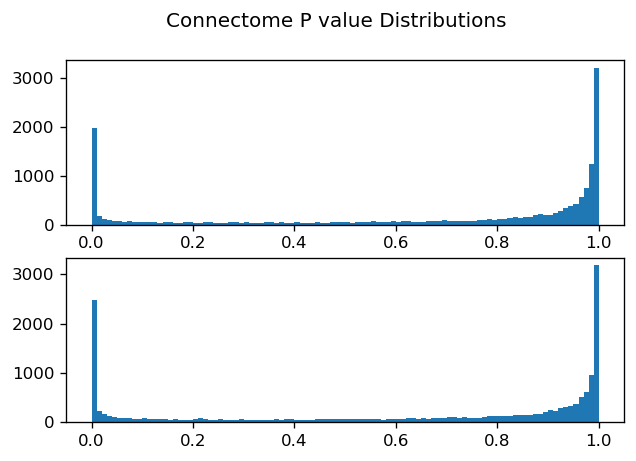

In [28]:
fig, (ax1, ax2) = plt.subplots(2, dpi=120)
fig.suptitle('Connectome P value Distributions')
ax1.hist(P_V_contra, bins=100)
ax2.hist(P_V_ipsi, bins=100)
plt.plot()

In [15]:
volume = pd.read_csv("dat/voxel.csv", index_col="KEY")
#volume.head(2)

In [16]:
new_df = pd.DataFrame(data=Dat, index=W_ipsi.index.values, columns=W_ipsi.columns.values)

In [17]:
print(graph_sparsity(new_df))

0.11807621944499548


In [ ]:
16%

In [46]:
new_df.head(2)

,Anterior_amygdalar_area,Anterior_cingulate_area_dorsal_part,Anterior_cingulate_area_ventral_part,Nucleus_accumbens,Anterodorsal_nucleus,Anterior_hypothalamic_nucleus,Agranular_insular_area_dorsal_part,Agranular_insular_area_posterior_part,Agranular_insular_area_ventral_part,Nucleus_ambiguus,...,Primary_visual_area,Posterolateral_visual_area,posteromedial_visual_area,Ventral_medial_nucleus_of_the_thalamus,Ventromedial_hypothalamic_nucleus,Ventral_posterolateral_nucleus_of_the_thalamus,Ventral_posteromedial_nucleus_of_the_thalamus,Ventral_posteromedial_nucleus_of_the_thalamus_parvicellular_part,Ventral_tegmental_area,Hypoglossal_nucleus
Anterior_amygdalar_area,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.113436,0.0
Anterior_cingulate_area_dorsal_part,0.0,0.0,0.949079,0.0,0.0,0.0,0.0,0.0,0.052523,0.0,...,0.700777,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.097992,0.0


In [44]:
jon_con = pd.read_csv("../dat/allen-mouse-conn/norm_density-max_ipsi_contra-pval_0.05.csv", index_col="ROW")
print(graph_sparsity(jon_con))

0.08966474905772664


In [45]:
jon_con.head(2)

,Anterior_amygdalar_area,Anterior_cingulate_area_dorsal_part,Anterior_cingulate_area_ventral_part,Nucleus_accumbens,Anterodorsal_nucleus,Anterior_hypothalamic_nucleus,Agranular_insular_area_dorsal_part,Agranular_insular_area_posterior_part,Agranular_insular_area_ventral_part,Nucleus_ambiguus,...,Primary_visual_area,Posterolateral_visual_area,posteromedial_visual_area,Ventral_medial_nucleus_of_the_thalamus,Ventromedial_hypothalamic_nucleus,Ventral_posterolateral_nucleus_of_the_thalamus,Ventral_posteromedial_nucleus_of_the_thalamus,Ventral_posteromedial_nucleus_of_the_thalamus_parvicellular_part,Ventral_tegmental_area,Hypoglossal_nucleus
ROW,,,,,,,,,,,,,,,,,,,,,
Anterior_amygdalar_area,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.809222,0.0
Anterior_cingulate_area_dorsal_part,0.0,0.0,4.08151,0.0,0.0,0.0,0.0,0.0,2.618372,0.0,...,3.949788,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.095399,0.0
